# A/B Testing Project
Author: Ruoxian Jia

This is the final project of Udactiy AB Testing Class: https://classroom.udacity.com/courses/ud257



## Project Description
Experiment Overview: Free Trial Screener
At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead.


The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.


## Brief Summary
Objectives: Reduce the number of students who were disappointed and had not paid because they could not study enough time should be reduced. At the same time, maintain the number of payments 

Method: add a pop-up message box to ask how much time they will spend

Question: Whether this method make a significant difference




## Metric Choice
#### Invariant Metrics(expected to be unchanged in the control and experimental groups):
* number of cookies (cannot be affected by the experiment: users made a decision to visit the page before they were asked the question);
* number of clicks (cannot be affected by the experiment: users clicked the button before they were asked the question);
* click-through probability (cannot be affected by the experiment: it equals to the number of clicks divided by the number of cookies).


#### Evaluation Metrics(expected to be different in the control and experimental groups):

* gross conversion (can be affected by the experiment / can decrease: users could make a decision to enroll in the free trial in the experimental group less than in the control group because they did not plan to learn 5+ hours per week);
* retention (can be affected by the experiment / can increase: enrolled users could be disappointed in the learning process less and make more payments in the experimental group than in the control group because they paid attention to studying 5+ hours per week);
* net conversion (can be affected by the experiment / can decrease: users could enroll in the free trial less in the experimental group than in the control group, thus could decrease the number of people who paid).

## Before Analysis

### Q1:  For each metric you selected as an evaluation metric, estimate its standard deviation analytically. Do you expect the analytic estimates to be accurate? That is, for which metrics, if any, would you want to collect an empirical estimate of the variability if you had time? (Sample size is 5000 cookies (visiting the course overview page)

### Question Type: Measuring Variability

This list contains rough estimates of the baseline values for these metrics 

* Unique cookies to view page per day: 40000
* Unique cookies to click "Start free trial" per day: 3200
* Enrollments per day: 660
* Click-through-probability on "Start free trial": 0.08
* Probability of enrolling, given click: 0.20625
* Probability of payment, given enroll: 0.53
* Probability of payment, given click 0.1093125

In [2]:
import math
print ("Num of Clicks = ", 5000 * 0.08)
print ("Num of Enrolling = ", 5000 * 0.08 * 0.20625)
print ("SD_Gross_conversion = ", math.sqrt(0.20625 * (1 - 0.20625) / 400))
print ("SD_Retention = ", math.sqrt(0.53 * (1 - 0.53) / 82.5))
print ("SD_Net_conversion = ", math.sqrt(0.1093125 * (1 - 0.1093125) / 400))

Num of Clicks =  400.0
Num of Enrolling =  82.5
SD_Gross_conversion =  0.020230604137049392
SD_Retention =  0.05494901217850908
SD_Net_conversion =  0.01560154458248846


Answer: In my view, the analytics estimates for gross coversion and net coversion will be accurate, since the denominator for them is the number of clicks, which is the unit of diversion. 

On the other side, I would like to collect an empirical estimate of the variability for the retention: the unit of diversion was not used in this case, the empirical variance of the retention is more likely to be higher than the analytical variance.

### Q2:Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric. (Assume the minmum dectable effect is 1%)

### Question Type: Sizing


In [8]:
## IDEA: For a bunch of Ns, compute the z_star by achieving desired alpha, then
## compute what beta would be for that N using the acquired z_star. 
## Pick the smallest N at which beta crosses the desired value

from scipy.stats import norm

def get_z_star(alpha):
    return -norm.ppf(alpha/2)

# Inputs:
#   z-star: The z-critical value
#   s: The standard error of the metric at N=1
#   d_min: The practical significance level
#   N: The sample size of each group of the experiment
# Returns: The beta value of the two-tailed test


def get_beta(z_star, s, d_min, N):
    se = s/math.sqrt(N)
    return norm.cdf(z_star*se, d_min, se)
# Inputs:
#   s: The standard error of the metric with N=1 in each group
#   d_min: The practical significance level
#   Ns: The sample sizes to try
#   alpha: The desired alpha level of the test
#   beta: The desired beta level of the test
# Returns: The smallest N out of the given Ns that will achieve the desired
#          beta. There should be at least N samples in each group of the experiment.
#          If none of the given Ns will work, returns -1. N is the number of
#          samples in each group.


def required_size(s,d_min, Ns, alpha, beta):
    for N in range(1,Ns+1):
        if get_beta(get_z_star(alpha),s,d_min, N) <= beta:
            return N
    return -1

In [18]:
print('Size_Gross_conversion:',required_size(math.sqrt(0.20625*(1-0.20625)*2),0.01, 50000, 0.05, 0.2))
print('Size_Retention:',required_size(math.sqrt(0.53*(1-0.53)*2),0.01, 50000, 0.05, 0.2))
print('Size_Net_conversion:',required_size(math.sqrt(0.1093125*(1-0.1093125)*2),0.01, 50000, 0.05, 0.2))

Size_Gross_conversion: 25699
Size_Retention: 39104
Size_Net_conversion: 15284


#### Could use online calculator as well: http://www.evanmiller.org/ab-testing/sample-size.html

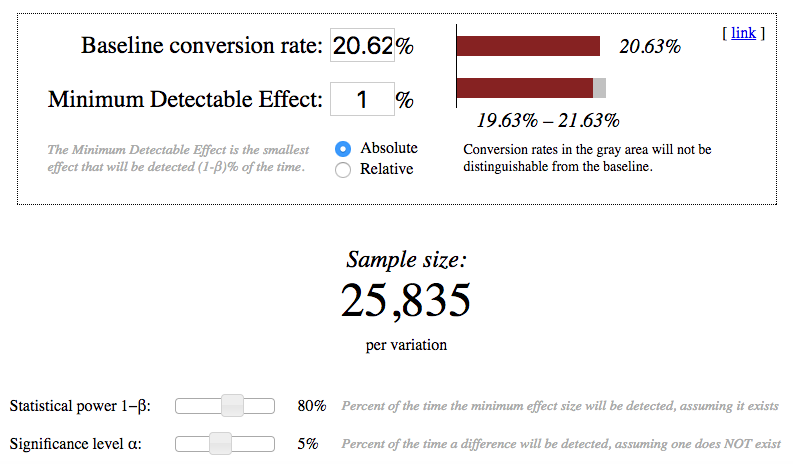

In [21]:
from IPython.display import Image
Image('Size_gc.png')

In [24]:
# convert the required size to required page views:
print ("Gross conversion: 2 × 25699 × 40000 ÷ 3200 = ", 2 * 25699 * 40000 / 3200.0)
print ("Retention: 2 × 39104 × 40000 ÷ 660 = ", 2 * 39104 * 40000 / 660.0)
print ("Net conversion:  2 × 15284 × 40000 ÷ 3200 = ", 2 * 15284 * 40000 / 3200.0)

Gross conversion: 2 × 25699 × 40000 ÷ 3200 =  642475.0
Retention: 2 × 39104 × 40000 ÷ 660 =  4739878.787878788
Net conversion:  2 × 15284 × 40000 ÷ 3200 =  382100.0


### Q4: What percentage of Udacity's traffic would you divert to this experiment (assuming there were no other experiments you wanted to run simultaneously)? Is the change risky enough that you wouldn't want to run on all traffic? Given the percentage you chose, how long would the experiment take to run, using the analytic estimates of variance? If the answer is longer than a few weeks, then this is unreasonably long, and you should reconsider an earlier decision.

### Question Type: Duration vs. Exposure

In [32]:
print ("Days_gross_coversion (100% of the traffic) = 642475  ÷ 40000 = {} days".format(math.ceil(642475 / 40000.0)))
print ("Days_retention (100% of the traffic) = 4739878 ÷ 40000 = {} days".format(math.ceil(4739878 / 40000.0)))
print ("Days_net_conversion (100% of the traffic) = 382100 ÷ 40000 = {} days".format(math.ceil(382100/ 40000.0 )))

Days_gross_coversion (100% of the traffic) = 642475  ÷ 40000 = 17 days
Days_retention (100% of the traffic) = 4739878 ÷ 40000 = 119 days
Days_net_conversion (100% of the traffic) = 382100 ÷ 40000 = 10 days


Answer: I will consider run the experiment for the net_conversion, since for the other two metrics, even we use 100% traffic, they still need 17 and 119 days respectively. Of course, it is too long for tasks staged in the project. Percent reduction in traffic will increase this interval. Hence, it is necessary to reduce the number of test metrics and choose only one of them: the net conversion.

For the experiment with the net conversion, we can use the period 10 days with the 100% traffic level. This interval is much better, but it might result in high commercial risk if we take 100% traffic. To slightly increase the time interval, we could set the percentage of used traffic at 50% and it gives us the number: 20 days.

It should be noted that the use of the fraction 0.5 does not affect the commercial interests seriously. From one side, the time interval and therefore the risk will increase. From another side, we keep the certain number of pageviews, therefore the experimental audience and the risk will not increase. It means our experiment could not practically be risky for the business.

## Experiment Analysis

This data contains the raw information needed to compute the above metrics, broken down day by day. Note that there are two sheets within the spreadsheet - one for the experiment group, and one for the control group.
https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0

The meaning of each column is:

* Pageviews: Number of unique cookies to view the course overview page that day.
* Clicks: Number of unique cookies to click the course overview page that day.
* Enrollments: Number of user-ids to enroll in the free trial that day.
* Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment.

(Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# Read the data for the control and experimental groups
control = pd.read_csv('Final Project Control.csv')
experiment = pd.read_csv('Final Project Experiment.csv')
control_enroll = control[:23]
experiment_enroll = experiment[:23]
print ("Control Group")
print (control.head(5))
print ()
print ("Experimental Group")
print (experiment.head(5))

Control Group
          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11       7723     687        134.0      70.0
1  Sun, Oct 12       9102     779        147.0      70.0
2  Mon, Oct 13      10511     909        167.0      95.0
3  Tue, Oct 14       9871     836        156.0     105.0
4  Wed, Oct 15      10014     837        163.0      64.0

Experimental Group
          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11       7716     686        105.0      34.0
1  Sun, Oct 12       9288     785        116.0      91.0
2  Mon, Oct 13      10480     884        145.0      79.0
3  Tue, Oct 14       9867     827        138.0      92.0
4  Wed, Oct 15       9793     832        140.0      94.0


In [47]:
# Describe the dataset
np.round(control.describe(include = 'all'))

,Date,Pageviews,Clicks,Enrollments,Payments
count,37,37.0,37.0,23.0,23.0
unique,37,NaN,NaN,NaN,NaN
top,"Sat, Oct 25",NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,9339.0,767.0,165.0,88.0
std,NaN,740.0,68.0,30.0,21.0
min,NaN,7434.0,632.0,110.0,56.0
25%,NaN,8896.0,708.0,146.0,70.0
50%,NaN,9420.0,759.0,162.0,91.0
75%,NaN,9871.0,825.0,175.0,102.0


In [48]:
np.round(experiment.describe(include = 'all'))

,Date,Pageviews,Clicks,Enrollments,Payments
count,37,37.0,37.0,23.0,23.0
unique,37,NaN,NaN,NaN,NaN
top,"Sat, Oct 25",NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,9315.0,766.0,149.0,85.0
std,NaN,708.0,65.0,33.0,23.0
min,NaN,7664.0,642.0,94.0,34.0
25%,NaN,8881.0,722.0,127.0,69.0
50%,NaN,9359.0,770.0,142.0,91.0
75%,NaN,9737.0,827.0,172.0,99.0


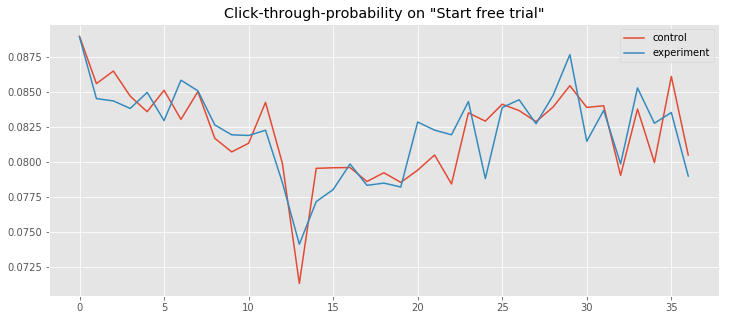

In [55]:
# Plot the evaluation metrics
plt.title('Click-through-probability on "Start free trial"')
plt.plot(control['Clicks']/control['Pageviews'], label='control')
plt.plot(experiment['Clicks']/experiment['Pageviews'], label='experiment')
plt.legend()
plt.show()

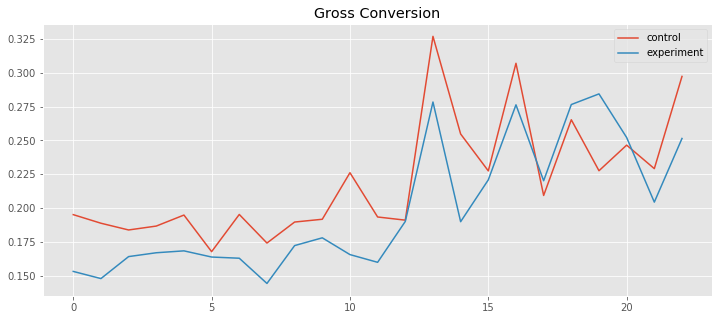

In [61]:
plt.title('Gross Conversion')
plt.plot(control_enroll['Enrollments']/control_enroll['Clicks'], label='control')
plt.plot(experiment_enroll['Enrollments']/experiment_enroll['Clicks'], label='experiment')
plt.legend()
plt.show()

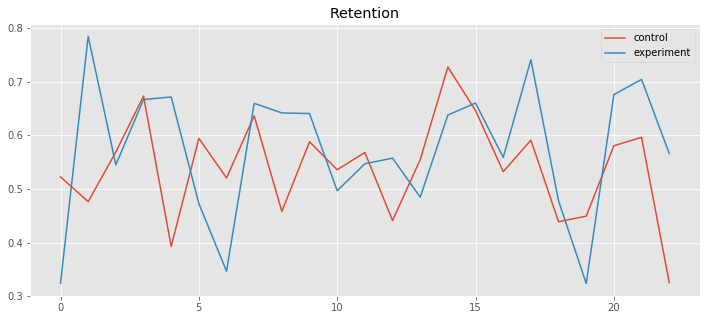

In [87]:
plt.title('Retention')
plt.plot(control_enroll['Payments']/control_enroll['Enrollments'], label='control')
plt.plot(experiment_data2['Payments']/experiment_enroll['Enrollments'], label='experiment')
plt.legend()
plt.show()

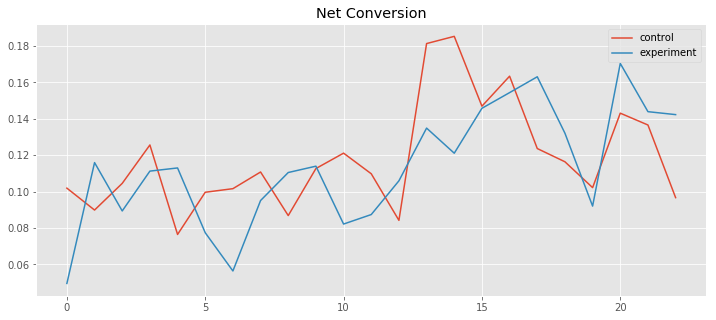

In [63]:
plt.title('Net Conversion')
plt.plot(control_enroll['Payments']/control_enroll['Clicks'], label='control')
plt.plot(experiment_enroll['Payments']/experiment_enroll['Clicks'], label='experiment')
plt.legend()
plt.show()

## Sanity Check
Check If the invariant metric is a simple count that should be randomly split between the two groups. If the sanity check fail, we can't conduct analysis. Under this situation, it might exists some problem in the experiment design process, we should look at the day by day data and see if can offer any insight into what is causing the problem.

Assume the confidence level is 95%

In [76]:
control_c = control['Clicks'].sum()
control_pv = control['Pageviews'].sum()
experiment_c = experiment['Clicks'].sum()
experiment_pv = experiment['Pageviews'].sum()
print ("Control Group:")
print ("Clicks = ", control_c,"\t", "Pageviews = ", control_pv.sum())
print ()
print ("Experimental Group:")
print ("Clicks = ", experiment_c.sum(),"\t","Pageviews = ",experiment_pv)

# checking invariant metrics

# cookies
p = 0.5
print ("Number of cookies:")
SE_cookies = math.sqrt(p * p / (control_pv + experiment_pv))
print ("Standard error SE = ", SE_cookies)
print ("Confidential interval CI = ", (p - SE_cookies*1.96, p + SE_cookies*1.96))
print (control_pv/(control_pv + experiment_pv), u'\u2208', (p - SE_cookies*1.96, p + SE_cookies*1.96), u'\u2713')
print ()

# clicks
print ('Number of clicks on “Start free trial":')
SE_clicks = math.sqrt(0.5 * 0.5 / (control_c + experiment_c))
print ("Standard error SE = ", SE_clicks)
print ("Confidential interval CI = ", (p - SE_clicks*1.96, p + SE_clicks*1.96))
print (control_c/(control_c + experiment_c), u'\u2208', (p - SE_clicks*1.96, p + SE_clicks*1.96), u'\u2713')
print ()

# ctr
print ('Click-through-probability on "Start free trial":')
p_pool = (control_c + experiment_c)/(control_pv + experiment_pv)
print ("p_pool = ", p_pool)
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1/control_pv + 1/ experiment_pv)) # POOL_SE = sqrt(p*(1-p)*(1/Ncon + 1/Nexp)) 
print ("Standard error SE = ", SE_pool)
diff = control_c/control_pv - experiment_c/experiment_pv
print ("Difference = ", diff)
print ("Confidential interval CI = ", (0 - SE_pool*1.96, 0 + SE_pool*1.96))
print ('diff', u'\u2208', (0 - SE_pool*1.96, 0 + SE_pool*1.96), u'\u2713')

Control Group:
Clicks =  28378 	 Pageviews =  345543

Experimental Group:
Clicks =  28325 	 Pageviews =  344660
Number of cookies:
Standard error SE =  0.0006018407402943247
Confidential interval CI =  (0.49882039214902313, 0.5011796078509769)
0.5006396668806133 ∈ (0.49882039214902313, 0.5011796078509769) ✓

Number of clicks on “Start free trial":
Standard error SE =  0.002099747079699252
Confidential interval CI =  (0.49588449572378945, 0.5041155042762105)
0.5004673474066628 ∈ (0.49588449572378945, 0.5041155042762105) ✓

Click-through-probability on "Start free trial":
p_pool =  0.08215409089789526
Standard error SE =  0.0006610608156387222
Difference =  -5.662709158693602e-05
Confidential interval CI =  (-0.0012956791986518956, 0.0012956791986518956)
diff ∈ (-0.0012956791986518956, 0.0012956791986518956) ✓


#### Answer: All invariant metrics pass the sanity check.

## Result Analysis

### Check for Practical and Statistical Significance

For evaluation metrics, calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.) - set practical significance is 1%

In [77]:
control_enroll_c = control_enroll['Clicks'].sum()
control_enroll_enrollments = control_enroll['Enrollments'].sum()
control_enroll_payments = control_enroll['Payments'].sum()

experiment_enroll_c = experiment_enroll['Clicks'].sum()
experiment_enroll_enrollments = experiment_enroll['Enrollments'].sum()
experiment_enroll_payments = experiment_enroll['Payments'].sum()

print ("Control group:")
print ("Clicks = ", control_enroll_c,"\t","Enrollments = ", control_enroll_enrollments,"\t","Payments = ", control_enroll_payments)

print ("Experimental group:")
print ("Clicks = ", experiment_enroll_c,"\t","Enrollments = ", experiment_enroll_enrollments,"\t","Payments = ", experiment_enroll_payments)

Control group:
Clicks =  17293 	 Enrollments =  3785.0 	 Payments =  2033.0
Experimental group:
Clicks =  17260 	 Enrollments =  3423.0 	 Payments =  1945.0


In [94]:
# checking evaluation metrics
print ("Gross conversion")
p_pool =(control_enroll_enrollments+ experiment_enroll_enrollments) / (control_enroll_c + experiment_enroll_c)
print ("p_pool = ", p_pool)
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1/control_enroll_c  + 1/experiment_enroll_c))
print ("SE = ", SE_pool)
diff = 3423.0 / 17260 - 3785.0 / 17293
print ("Difference = ", diff)
print ("CI = ", (diff - SE_pool*1.96, diff + SE_pool*1.96))
print (0, u'\u2209', (diff - SE_pool*1.96, diff + SE_pool*1.96), \
       ";  dmin = -0.01 or 0.01", u'\u2209', (diff - SE_pool*1.96, diff + SE_pool*1.96))
print ("Statistical significance", u'\u2713', "  Practical significance ", u'\u2713')
print()

print ("Retention/14days")
p_pool =(control_enroll_payments+ experiment_enroll_payments) / (control_enroll_enrollments+ experiment_enroll_enrollments)
print ("p_pool = ", p_pool)
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1/control_enroll_enrollments + 1/experiment_enroll_enrollments))
print ("SE = ", SE_pool)
diff = 1945.0 / 3423.0 - 2033.0 / 3785
print ("Difference = ", diff)
print ("CI = ", (diff - SE_pool*1.96, diff + SE_pool*1.96))
print (0, u'\u2209', (diff - SE_pool*1.96, diff + SE_pool*1.96), \
       ";  dmin = -0.01 or 0.01", u'\u2209', (diff - SE_pool*1.96, diff + SE_pool*1.96))
print ("Statistical significance", u'\u2713', "  Practical significance ", u'\u2718')
print()

print ("Net conversion")
p_pool = 1.0 * (control_enroll_payments + experiment_enroll_payments) / (control_enroll_c + experiment_enroll_c)
print ("p_pool = ", p_pool)
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1/control_enroll_c  + 1/experiment_enroll_c))
print ("SE = ", SE_pool)
ME_pool = SE_pool * 1.96

diff = 1945.0 / 17260 - 2033.0 / 17293
print ("Difference = ", diff)
print ("CI = ", (diff - SE_pool*1.96, diff + SE_pool*1.96))
print (0, u'\u2208', (diff - SE_pool*1.96, diff + SE_pool*1.96), \
       ";  dmin = -0.01 or 0.01", u'\u2208', (diff - SE_pool*1.96, diff + SE_pool*1.96))
print ("Statistical significance", u'\u2718', "Practical significance ", u'\u2718')

Gross conversion
p_pool =  0.20860706740369866
SE =  0.004371675385225936
Difference =  -0.020554874580361565
CI =  (-0.0291233583354044, -0.01198639082531873)
0 ∉ (-0.0291233583354044, -0.01198639082531873) ;  dmin = -0.01 or 0.01 ∉ (-0.0291233583354044, -0.01198639082531873)
Statistical significance ✓   Practical significance  ✓

Retention/14days
p_pool =  0.5518867924528302
SE =  0.011729780091389183
Difference =  0.031094804707142765
CI =  (0.008104435728019967, 0.05408517368626556)
0 ∉ (0.008104435728019967, 0.05408517368626556) ;  dmin = -0.01 or 0.01 ∉ (0.008104435728019967, 0.05408517368626556)
Statistical significance ✓   Practical significance  ✘

Net conversion
p_pool =  0.1151274853124186
SE =  0.0034341335129324238
Difference =  -0.0048737226745441675
CI =  (-0.011604624359891718, 0.001857179010803383)
0 ∈ (-0.011604624359891718, 0.001857179010803383) ;  dmin = -0.01 or 0.01 ∈ (-0.011604624359891718, 0.001857179010803383)
Statistical significance ✘ Practical significance  

I didn't apply the Bonferroni correction In there. But if, the alpha for each hypothesis will be 5/3 % instead of 5% and confidential intervals will be wider, since we measured three metrics in one experiment

## Sign Test

Consider do a sign test using the day-by-day breakdown.

In [92]:
## For gross conver
Gross_conversion_success = experiment_enroll['Enrollments']/experiment_enroll['Clicks'] \
>control_enroll['Enrollments']/control_enroll['Clicks']
print ("Gross conversion: success =", Gross_conversion_success.sum(), "  total =", Gross_conversion_success.size)

Gross conversion: success = 4   total = 23


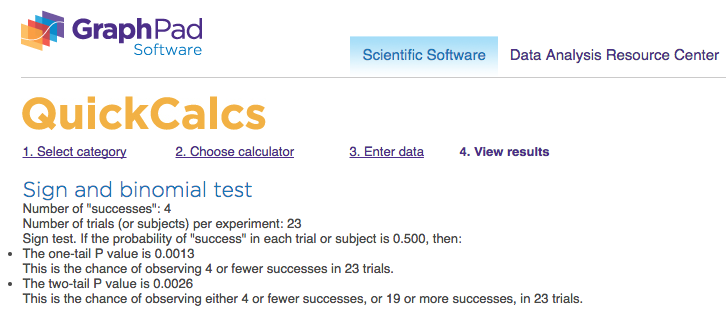

In [93]:
#Using online tool: http://graphpad.com/quickcalcs/binomial1.cfm
Image('sign_gross_conver.png')

## Summary

According to the analysis before, the pop-up message box would statistically significantly reduce the gross conversion, but would not affect the net conversion in a statistically significant way, and would not affect the retention and net conversion in a practically significant way


## Recommendations

Based on the analysis, I would not recommend Udacity to launch the experiment change because the negative results have outweighed the positive ones.

### Positive results of the experiment.

* The difference for the gross conversion is practically significant and negative. This is a good sign: the Udacity team can lower costs by a number of trial signups.
* The difference for the net conversion is not statistically significant. It means the absence of serious financial losses.

### Negative results of the experiment:

* The interval for the difference in the case of the net conversion includes negative numbers. Therefore, the team has a risk to decrease incomes.
* The retention is not practically significant which means we cannot conclude that the message box actually make the students enrolled less disappoint.